**kết nối drive**

In [ ]:
#ket noi drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ml/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import thư viện

In [ ]:
#import thu vien can thiet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Xử lý tiền dữ liệu**

In [ ]:

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/gdrive/MyDrive/ml/sleep_health.csv')
# Kiểm tra số lượng giá trị thiếu
missing_count = data.isnull().sum()

# Hiển thị số lượng giá trị thiếu ban đầu
print("Số lượng giá trị thiếu ban đầu:")
print(missing_count)

# Lấy danh sách các cột có giá trị thiếu
missing_cols = missing_count[missing_count > 0].index.tolist()

# Thay thế NaN bằng phương pháp LOCF
data = data.ffill()

# Kiểm tra xem còn giá trị thiếu nào không
remaining_missing = data.isnull().sum().sum()
if remaining_missing == 0:
    print("Không còn giá trị thiếu.")
else:
    print(f"Có tổng cộng {remaining_missing} giá trị thiếu cần xử lý.")


Số lượng giá trị thiếu ban đầu:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
Không còn giá trị thiếu.


Tách cột Blood Pressure thành 2 cột Blood Pressure 1 và Blood Pressure 2  để việc xử lý dữ liệu dễ dàng hơn

In [ ]:
# Tách cột 'Blood Pressure' thành hai cột 'Blood Pressure 1' và 'Blood Pressure 2'
data[['Blood Pressure 1', 'Blood Pressure 2']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Xóa cột 'Blood Pressure' gốc
data = data.drop('Blood Pressure', axis=1)

# Hiển thị các dòng đầu tiên của dữ liệu sau khi tách cột và xóa cột gốc
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


BIểu đồ để: so sánh phân phối các nhóm trong biến phân loại với biến mục tiêu, giúp thấy rõ số lượng người bị và không bị rối loạn giấc ngủ trong từng nhóm của các biến như "Gender", "Occupation", và "BMI Category".


<ipython-input-35-9156dd7a4f56>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-35-9156dd7a4f56>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-35-9156dd7a4f56>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


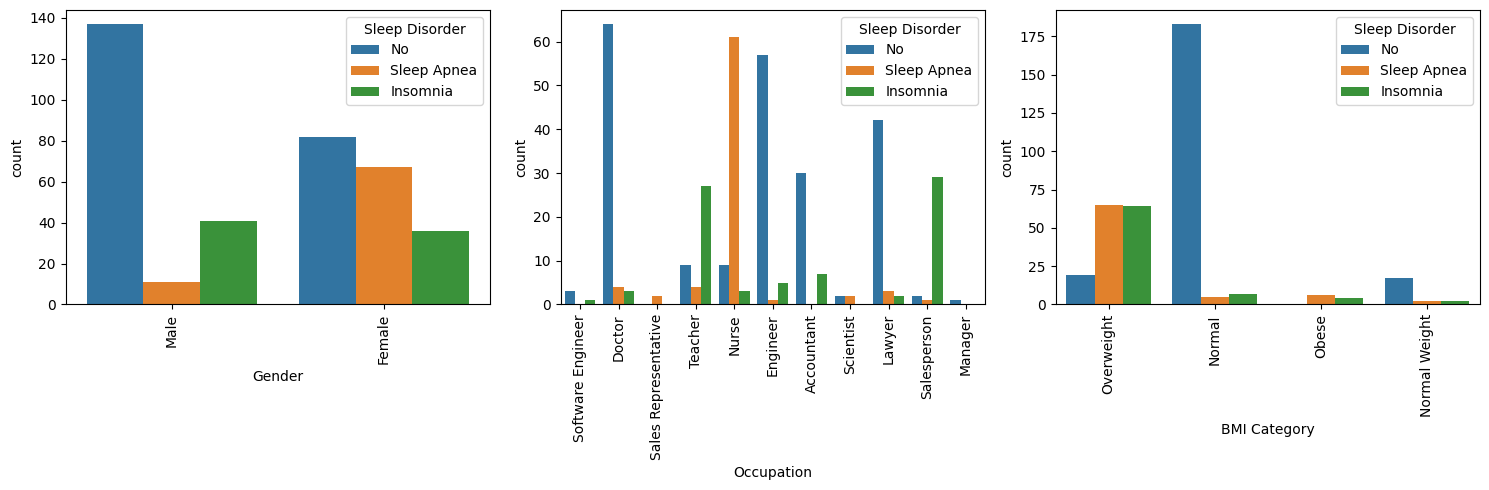

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cat_vars = ['Gender', 'Occupation', 'BMI Category']


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Sleep Disorder', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()


BIểu đồ hiển thị tỷ lệ phần trăm của các nhóm trong các biến phân loại "Gender", "Occupation", và "BMI Category".

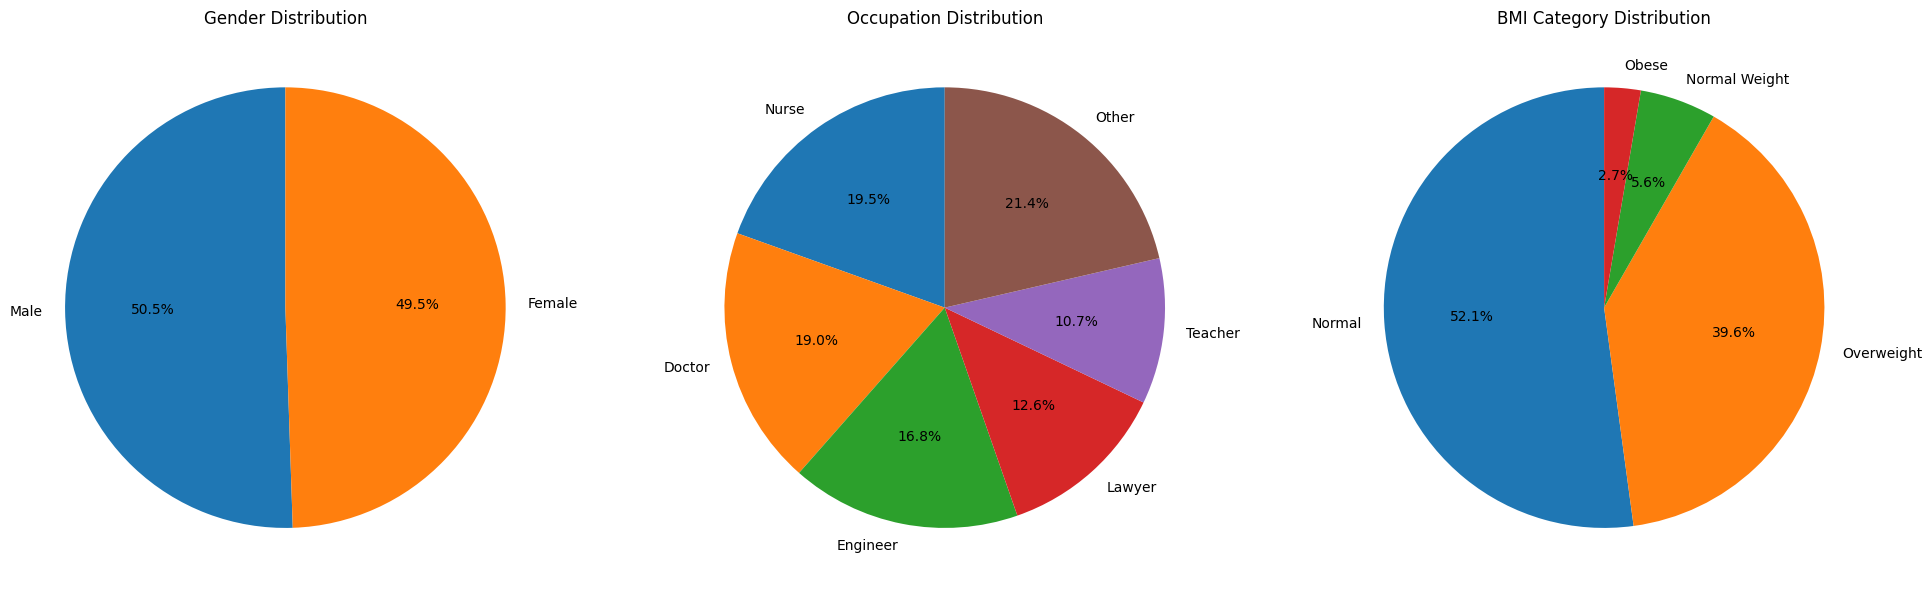

In [ ]:


max_categories = 5

cat_vars = ['Gender', 'Occupation', 'BMI Category']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))  # Điều chỉnh kích thước hình ảnh

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):

        cat_counts = data[var].value_counts()'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()

plt.show()

**Neural network**

Unique values in 'Sleep Disorder' column:
Sleep Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
Accuracy: 0.96
Precision: 0.967741935483871
Recall: 0.9375
F1-Score: 0.9523809523809523


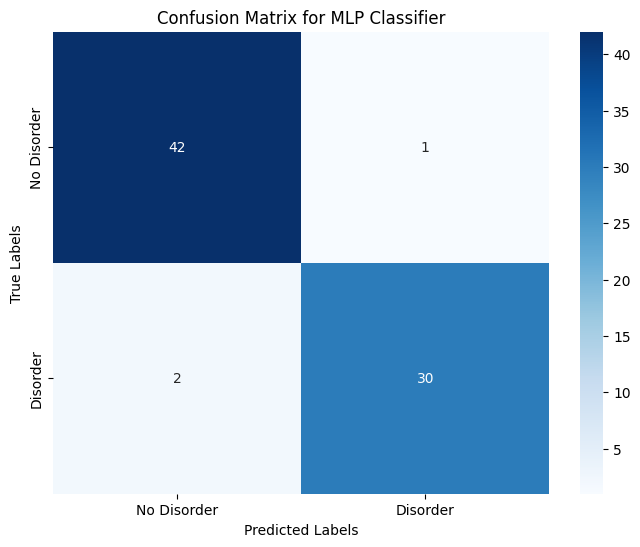

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'sleep_health.csv'
data = pd.read_csv(file_path)
print("Unique values in 'Sleep Disorder' column:")
print(data['Sleep Disorder'].value_counts())
data['Sleep Disorder'] = data['Sleep Disorder'].apply(lambda x: 1 if x != 'No' else 0)


data[['Blood Pressure 1', 'Blood Pressure 2']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop('Blood Pressure', axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)


X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Disorder', 'Disorder'], yticklabels=['No Disorder', 'Disorder'])
plt.title('Confusion Matrix for MLP Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Dựa trên biểu đồ Confusion Matrix và các chỉ số đánh giá kết quả của mô hình MLPClassifier, chúng ta có thể thấy mô hình này hoạt động khá hiệu quả trong việc phân loại rối loạn giấc ngủ. Dưới đây là chi tiết về từng thành phần:

Confusion Matrix:
Các số liệu trên biểu đồ:
True No Disorder (42): Mô hình dự đoán chính xác 42 trường hợp không có rối loạn.
False Disorder (1): Một trường hợp không có rối loạn bị nhầm lẫn là có rối loạn.
False No Disorder (2): Hai trường hợp có rối loạn bị nhầm lẫn là không có rối loạn.
True Disorder (30): Mô hình dự đoán chính xác 30 trường hợp có rối loạn.
Các Chỉ Số Đánh Giá:
Accuracy (0.96 hay 96%): Phần lớn các dự đoán của mô hình là chính xác, với tỷ lệ chính xác 96%. Điều này cho thấy mô hình tổng thể rất hiệu quả.
Precision (0.9677 hay 96.77%): Cho biết khi mô hình dự đoán một trường hợp có rối loạn, có 96.77% khả năng dự đoán đó là chính xác.
Recall (0.9375 hay 93.75%): Cho biết mô hình có khả năng phát hiện 93.75% các trường hợp thực sự có rối loạn.
F1-Score (0.9524 hay 95.24%): Là trung bình điều hòa của Precision và Recall, cung cấp một đánh giá cân bằng về hiệu quả của mô hình trong việc phân loại.
Tổng Kết:
Biểu đồ và các chỉ số cho thấy mô hình MLPClassifier đã được huấn luyện tốt để phân loại các trường hợp rối loạn giấc ngủ, với hiệu quả cao trong việc phát hiện cả hai trạng thái "có rối loạn" và "không rối loạn".


**Logistic Regression**

              precision    recall  f1-score   support

          No       0.95      0.98      0.97        43
 Sleep Apnea       0.92      0.69      0.79        16
    Insomnia       0.74      0.88      0.80        16

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.90      0.89      0.89        75



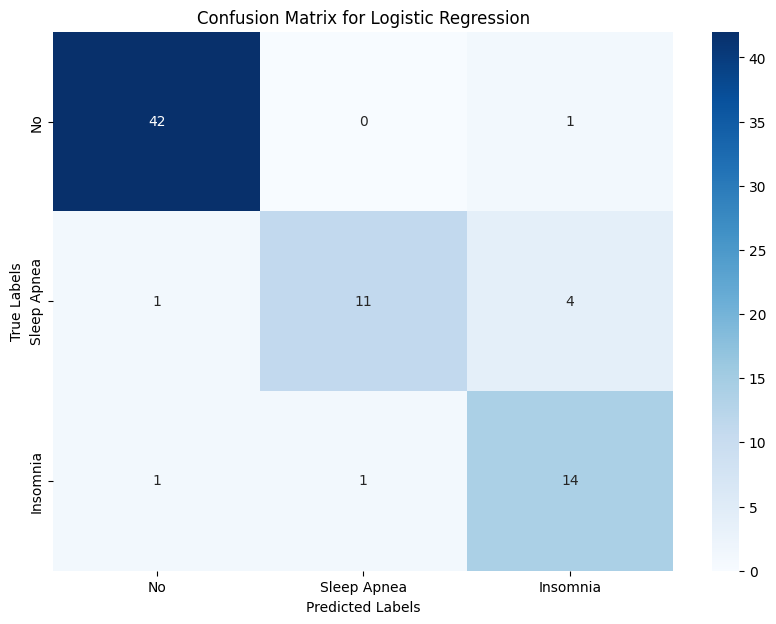

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'sleep_health.csv'
data = pd.read_csv(file_path)

data['Sleep Disorder'] = data['Sleep Disorder'].map({'No': 0, 'Sleep Apnea': 1, 'Insomnia': 2})

data[['Blood Pressure 1', 'Blood Pressure 2']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop('Blood Pressure', axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)


X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No', 'Sleep Apnea', 'Insomnia']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Sleep Apnea', 'Insomnia'], yticklabels=['No', 'Sleep Apnea', 'Insomnia'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Đánh giá: từ biểu đồ Confusion Matrix và bảng Classification Report, chúng ta có thể phân tích chi tiết hiệu suất của mô hình Logistic Regression trong việc phân loại ba loại rối loạn giấc ngủ: Không rối loạn (No), Chứng ngưng thở khi ngủ (Sleep Apnea), và Chứng mất ngủ (Insomnia)

Confusion Matrix
Các số liệu:
Dòng "No": 42 trường hợp được dự đoán chính xác là "No", 1 trường hợp sai lầm dự đoán là "Insomnia".
Dòng "Sleep Apnea": 1 trường hợp sai lầm dự đoán là "No", 11 trường hợp được dự đoán chính xác là "Sleep Apnea", 4 trường hợp sai lầm dự đoán là "Insomnia".
Dòng "Insomnia": 1 trường hợp sai lầm dự đoán là "No", 1 trường hợp sai lầm dự đoán là "Sleep Apnea", và 14 trường hợp được dự đoán chính xác là "Insomnia".
Classification Report
Precision: Độ chính xác theo lớp cho thấy tỷ lệ của các dự đoán đúng so với tổng số dự đoán cho từng lớp.
No: 0.95, tức là 95% dự đoán là "No" là chính xác.
Sleep Apnea: 0.92, tức là 92% dự đoán là "Sleep Apnea" là chính xác.
Insomnia: 0.74, tức là chỉ 74% dự đoán là "Insomnia" là chính xác.
Recall: Độ nhạy cho thấy tỷ lệ của các dự đoán đúng so với số trường hợp thực sự là đúng cho từng lớp.
No: 0.98, tức là 98% các trường hợp thực sự là "No" được dự đoán chính xác.
Sleep Apnea: 0.69, tức là chỉ 69% các trường hợp thực sự là "Sleep Apnea" được dự đoán chính xác.
Insomnia: 0.88, tức là 88% các trường hợp thực sự là "Insomnia" được dự đoán chính xác.
F1-Score: Đây là trung bình điều hòa của Precision và Recall, đo lường sự cân bằng giữa độ chính xác và độ nhạy.
No: 0.97, cho thấy một sự cân bằng rất tốt giữa Precision và Recall.
Sleep Apnea: 0.79, cho thấy một sự cân bằng khá thấp, vì Recall thấp.
Insomnia: 0.80, cho thấy một sự cân bằng tương đối tốt, mặc dù Precision thấp.
Tổng kết
Mô hình này hoạt động tốt nhất với việc phân loại trường hợp không có rối loạn giấc ngủ (No), có độ chính xác và độ nhạy rất cao.
Trong khi đó, mô hình có vấn đề với việc nhận dạng chính xác "Sleep Apnea", thể hiện qua Recall thấp.
Đối với "Insomnia", mặc dù Recall cao nhưng Precision lại khá thấp, cho thấy mô hình có xu hướng dự đoán quá mức cho tình trạng này, dẫn đến một số lượng sai lầm.
Tổng thể, mô hình có hiệu suất khá tốt với độ chính xác tổng thể là 89%, nhưng có thể cần điều chỉnh thêm để cải thiện hiệu quả trong việc phân loại các loại rối loạn giấc ngủ cụ thể, đặc biệt là cải thiện Recall cho "Sleep Apnea" và Precision cho "Insomnia".

**Random Forest Classifier**

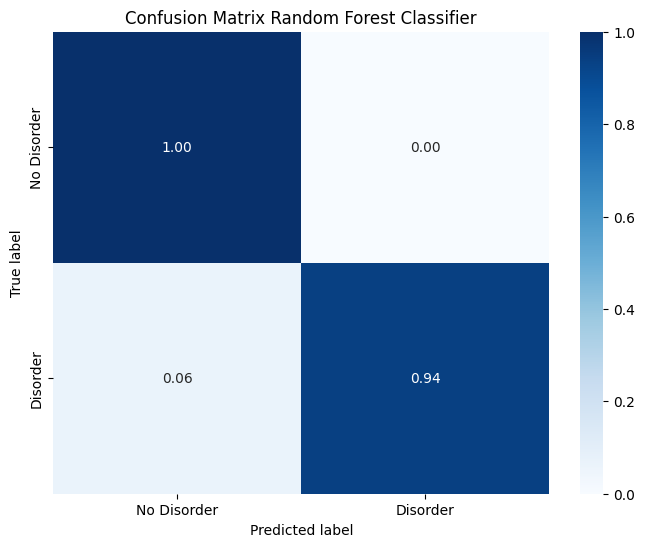

Accuracy: 0.9733333333333334
Precision: 1.0
Recall: 0.9375
F1-Score: 0.967741935483871


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/gdrive/MyDrive/ml/sleep_health.csv'
data = pd.read_csv(file_path)

data['Sleep Disorder'] = data['Sleep Disorder'].apply(lambda x: 1 if x != 'No' else 0)

data[['Blood Pressure 1', 'Blood Pressure 2']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop('Blood Pressure', axis=1)
data = pd.get_dummies(data, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_indices = X_test.index

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

data.loc[test_indices, 'Predicted Sleep Disorder'] = y_pred

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Chuẩn hóa

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=['No Disorder', 'Disorder'], yticklabels=['No Disorder', 'Disorder'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Biểu đồ Confusion Matrix và các chỉ số đánh giá hiệu suất (Accuracy, Precision, Recall, F1-Score) liên quan chặt chẽ với nhau và cùng cung cấp một cái nhìn toàn diện về hiệu suất của mô hình phân loại. Dưới đây là cách hai loại thông tin này tương quan với nhau:

1. Confusion Matrix
Biểu đồ này hiển thị:

True Positives (TP): Đường chéo trên cùng bên trái (1.00 cho No Disorder), thể hiện số lượng dự đoán chính xác là không có rối loạn.
True Negatives (TN): Đường chéo dưới cùng bên phải (0.94 cho Disorder), thể hiện số lượng dự đoán chính xác là có rối loạn.
False Positives (FP): Ô trên cùng bên phải (0.00), thể hiện số lượng dự đoán sai là có rối loạn khi thực tế không có.
False Negatives (FN): Ô dưới cùng bên trái (0.06), thể hiện số lượng dự đoán sai là không có rối loạn khi thực tế có.
2. Các Chỉ Số Đánh Giá Hiệu Suất
Accuracy (0.9733 hay 97.33%)

Tính bằng tổng số dự đoán đúng (TP + TN) chia cho tổng số dự đoán. Trong trường hợp này, độ chính xác cao phản ánh số lượng lớn TP và TN so với FP và FN.
Precision (1.0 hay 100%)

Tính bằng tỷ lệ TP so với tổng số dự đoán là positive (TP + FP). Precision 100% cho thấy không có FP, tức là mọi dự đoán có rối loạn đều chính xác.
Recall (0.9375 hay 93.75%)

Tính bằng tỷ lệ TP so với tổng số trường hợp thực sự là positive (TP + FN). Recall thấp hơn so với precision cho thấy có một số FN, tức là một số trường hợp có rối loạn không được phát hiện.
F1-Score (0.9677 hay 96.77%)

Là trung bình điều hòa của Precision và Recall, cung cấp một độ đo tổng hợp về sự cân bằng giữa Precision và Recall. F1-Score cao thể hiện sự cân bằng tốt giữa việc không có FP và giảm thiểu FN.
Tương quan giữa Confusion Matrix và các Chỉ Số
Confusion Matrix cung cấp một cái nhìn chi tiết hơn về lỗi cụ thể của mô hình (FP và FN), trong khi các chỉ số đánh giá như Accuracy, Precision, Recall, và F1-Score cho ta cái nhìn tổng quan hơn về hiệu suất tổng thể. Cả hai cùng hỗ trợ nhau trong việc đánh giá một cách toàn diện khả năng của mô hình trong việc phân loại chính xác các trường hợp có rối loạn giấc ngủ và không. Biểu đồ Confusion Matrix và các chỉ số này giúp nhà phân tích hiểu rõ về mô hình, từ đó có thể đưa ra quyết định cải tiến hoặc tinh chỉnh mô hình để đạt được hiệu suất tốt hơn.

**TỔng hợp**

+---------------------+--------------------+-------------------+--------+--------------------+
|        Model        |      Accuracy      |     Precision     | Recall |      F1-Score      |
+---------------------+--------------------+-------------------+--------+--------------------+
|         MLP         |        0.96        | 0.967741935483871 | 0.9375 | 0.9523809523809523 |
| Logistic Regression | 0.9466666666666667 |       0.9375      | 0.9375 |       0.9375       |
|    Random Forest    | 0.9733333333333334 |        1.0        | 0.9375 | 0.967741935483871  |
+---------------------+--------------------+-------------------+--------+--------------------+


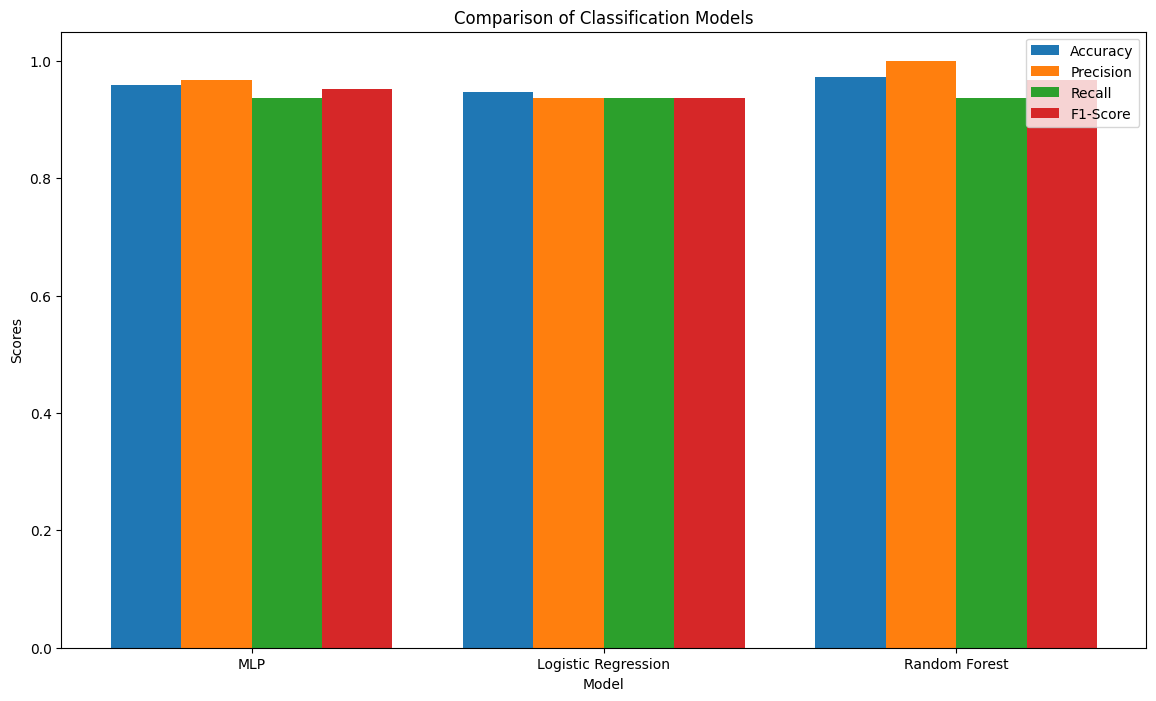

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable

file_path = 'sleep_health.csv'
data = pd.read_csv(file_path)

data['Sleep Disorder'] = data['Sleep Disorder'].apply(lambda x: 1 if x != 'No' else 0)

data[['Blood Pressure 1', 'Blood Pressure 2']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data = data.drop('Blood Pressure', axis=1)

data = pd.get_dummies(data, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.loc[len(results)] = [model_name, accuracy, precision, recall, f1]

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
evaluate_model(mlp, 'MLP')

# Đánh giá mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)
evaluate_model(log_reg, 'Logistic Regression')

# Đánh giá mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, 'Random Forest')

x = PrettyTable()
x.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
for index, row in results.iterrows():
    x.add_row(row)
print(x)

fig, ax = plt.subplots(figsize=(14, 8))

n_groups = len(results)

index = np.arange(n_groups)

bar_width = 0.2

rects1 = ax.bar(index, results['Accuracy'], bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, results['Precision'], bar_width, label='Precision')
rects3 = ax.bar(index + 2*bar_width, results['Recall'], bar_width, label='Recall')
rects4 = ax.bar(index + 3*bar_width, results['F1-Score'], bar_width, label='F1-Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(results['Model'])
ax.legend()

# Hiển thị biểu đồ
plt.show()


Biểu đồ cho thấy so sánh trực quan về hiệu suất của ba mô hình phân loại: MLP (Perceptron đa lớp), Logistic Regression và Random Forest. Mỗi cột màu đại diện cho một chỉ số đánh giá cụ thể: Accuracy (xanh lam), Precision (cam), Recall (xanh lá) và F1-Score (đỏ). Dưới đây là phân tích chi tiết về biểu đồ và kết quả từ bảng.

Phân Tích Biểu Đồ:
MLP (Cột 1):
Accuracy cao (gần 0.96).
Precision rất cao (gần 0.97).
Recall cao (gần 0.94).
F1-Score cao (gần 0.95).
Logistic Regression (Cột 2):
Accuracy thấp hơn MLP một chút (gần 0.95).
Precision, Recall và F1-Score đều bằng nhau (khoảng 0.94).
Random Forest (Cột 3):
Accuracy cao nhất (gần 0.97).
Precision hoàn hảo (1.0).
Recall cao (gần 0.94).
F1-Score cao (gần 0.97).
Phân Tích Kết Quả:
MLP:
Đạt kết quả rất tốt với mọi chỉ số, đặc biệt là Precision cao.
Cân bằng tốt giữa Recall và Precision, cho thấy mô hình này hiệu quả trong việc phân loại cả hai lớp (có rối loạn và không có rối loạn).
Logistic Regression:
Cho thấy sự cân bằng giữa Precision và Recall, tuy nhiên không cao bằng MLP và Random Forest.
Phù hợp cho các ứng dụng cần đánh giá chính xác mà không quá ưu tiên một chỉ số nào đó (Precision hoặc Recall).
Random Forest:
Cho thấy hiệu suất xuất sắc, đặc biệt là Precision hoàn hảo.
Rất hiệu quả trong việc phân loại đúng các trường hợp có rối loạn, với rất ít hoặc không có false positives.
F1-Score cao cho thấy một sự cân bằng tốt giữa Precision và Recall, làm cho nó trở thành mô hình có hiệu suất cao nhất trong ba mô hình được đánh giá.
Tổng Kết:
Biểu đồ và bảng kết quả cho thấy Random Forest có hiệu suất tổng thể tốt nhất trong ba mô hình, đặc biệt là trong việc giảm thiểu số lượng dự đoán sai cho những trường hợp có rối loạn. MLP cũng cho kết quả rất tốt, với một sự cân bằng tốt giữa các chỉ số. Logistic Regression có hiệu suất thấp hơn một chút nhưng vẫn là một lựa chọn đáng tin cậy cho nhiều bài toán phân loại. Biểu đồ này giúp các nhà khoa học dữ liệu và các nhà phân tích dễ dàng so sánh và chọn lựa mô hình phù hợp cho ứng dụng cụ thể dựa trên các yêu cầu về độ chính xác và độ nhạy.